# PGA Tour Top 10 Prediction - Logistic Regression

This notebook implements our first model using logistic regression to predict whether a player will finish in the top 10.

## Steps:
1. Load preprocessed data
2. Train logistic regression model
3. Evaluate performance
4. Analyze feature importance
5. Make predictions

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
plt.style.use('seaborn')
sns.set_palette('husl')

/var/folders/br/rct9ypdj6zg6sq91wz9ycqzm0000gn/T/ipykernel_30265/2816345061.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 1. Load Preprocessed Data

In [2]:
# Load preprocessed datasets
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFeatures:", X_train.columns.tolist())

Training set shape: (29491, 20)
Testing set shape: (7373, 20)

Features: ['finish_SDP', 'finish_FDP', 'finish_DKP', 'total_FDP', 'total_DKP', 'total_SDP', 'streak_FDP', 'hole_FDP', 'hole_DKP', 'streak_DKP', 'hole_SDP', 'streak_SDP', 'sg_total', 'sg_t2g', 'pos', 'n_rounds', 'hole_par', 'made_cut', 'strokes', 'no_cut']


## 2. Train Logistic Regression Model

We'll use sklearn's LogisticRegression with balanced class weights to handle our imbalanced dataset.

In [3]:
# Initialize and train the model
model = LogisticRegression(
    class_weight='balanced',  # Handle class imbalance
    random_state=42,         # For reproducibility
    max_iter=1000            # Increase iterations for convergence
)

# Fit the model
model.fit(X_train, y_train.values.ravel())

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

## 3. Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6631
           1       1.00      1.00      1.00       742

    accuracy                           1.00      7373
   macro avg       1.00      1.00      1.00      7373
weighted avg       1.00      1.00      1.00      7373



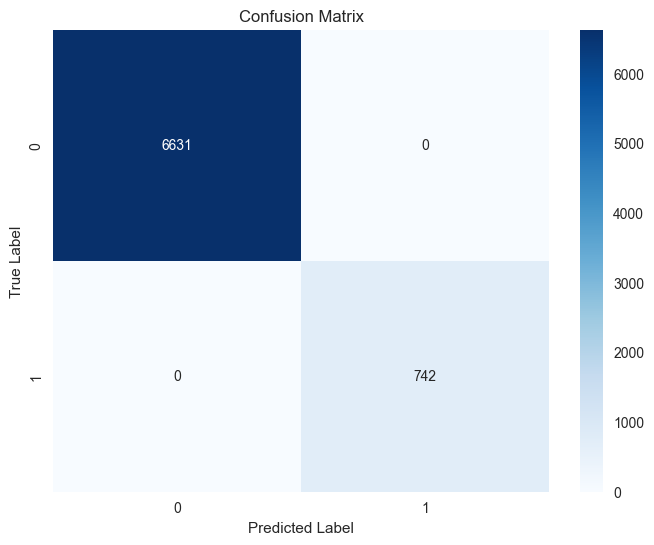

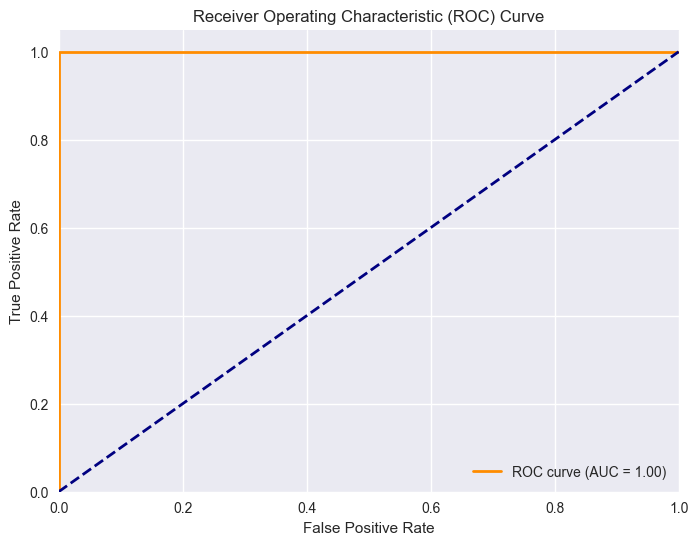

In [4]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 4. Feature Importance Analysis

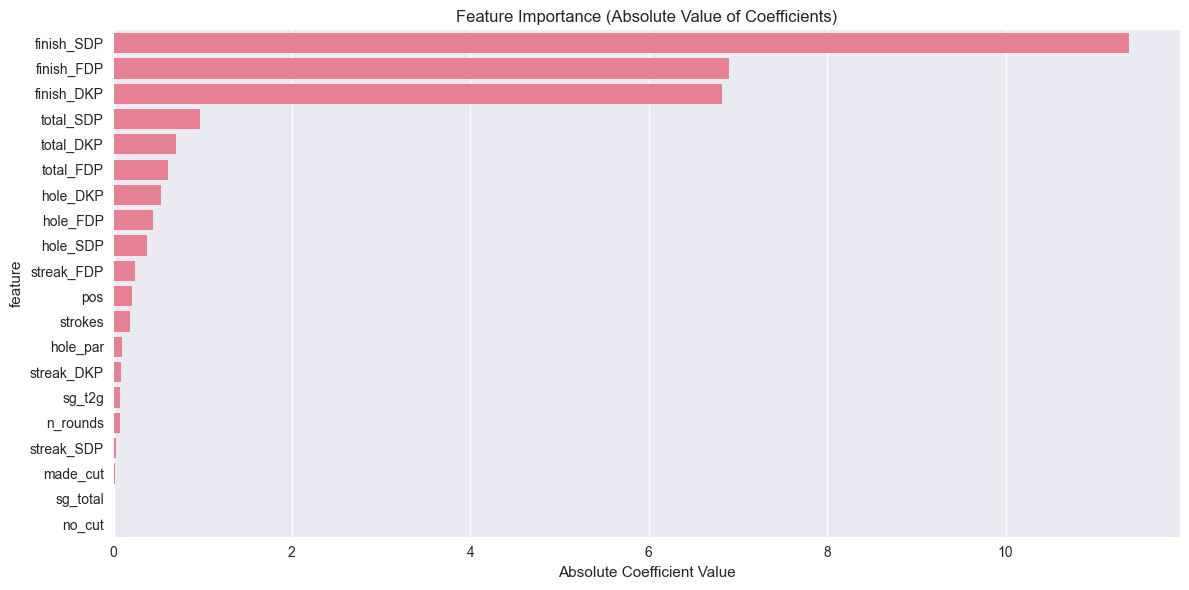


Top 10 Most Important Features:
       feature  importance
0   finish_SDP   11.386231
1   finish_FDP    6.900758
2   finish_DKP    6.826555
5    total_SDP    0.971117
4    total_DKP    0.696696
3    total_FDP    0.614637
8     hole_DKP    0.528046
7     hole_FDP    0.446272
10    hole_SDP    0.377539
6   streak_FDP    0.239602


In [5]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(model.coef_[0])
})

# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Absolute Value of Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

## 5. Prediction Analysis

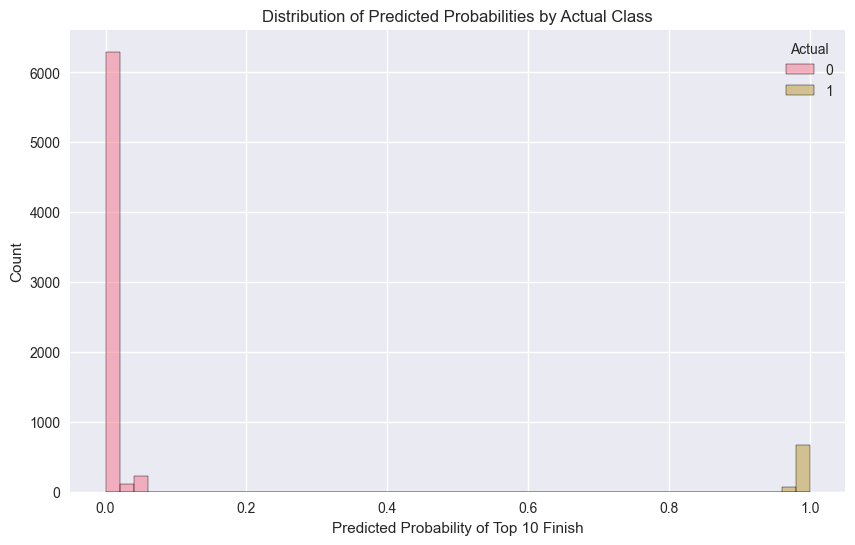


Sample Predictions (showing top 10 highest probability predictions):
      Actual  Predicted  Probability
3118       1          1          1.0
5217       1          1          1.0
3300       1          1          1.0
3292       1          1          1.0
6686       1          1          1.0
3283       1          1          1.0
3274       1          1          1.0
4393       1          1          1.0
3265       1          1          1.0
3234       1          1          1.0


In [6]:
# Create DataFrame with actual and predicted values
results = pd.DataFrame({
    'Actual': y_test.values.ravel(),
    'Predicted': y_pred,
    'Probability': y_pred_proba
})

# Analyze prediction probabilities
plt.figure(figsize=(10, 6))
sns.histplot(data=results, x='Probability', hue='Actual', bins=50)
plt.title('Distribution of Predicted Probabilities by Actual Class')
plt.xlabel('Predicted Probability of Top 10 Finish')
plt.show()

# Show some example predictions
print("\nSample Predictions (showing top 10 highest probability predictions):")
print(results.sort_values('Probability', ascending=False).head(10))